__Pipeline Runner__

Welcome to the pipeline runner. This tool allows you to load data on strong lenses, and pass it to pipelines for a strong lens analysis. To show you around, we'll load up some example data and run it through some of the example pipelines that come distributed with PyAutoLens.

The runner is supplied as both this Python script and a Juypter notebook. Its up to you which you use - I personally prefer the python script as provided you keep it relatively small, its quick and easy to comment out different lens names and pipelines to set off different analyses. However, notebooks are a tidier way to manage visualization - so feel free to use notebooks. Or, use both for a bit, and decide your favourite!

The pipeline runner is fairly self explanatory. Make sure to checkout the pipelines in the _workspace/pipelines/examples/_ folder - they come with detailed descriptions of what they do! I hope that you'll expand on them for your own personal scientific needs

In [1]:
from autofit import conf
from autolens.data import ccd
from autolens.data.plotters import ccd_plotters

First, lets setup the path to the .fits file of the image.

In [2]:
# If you are using Docker, the path to the workspace is as follows (e.g. comment out this line)!
# path = '/home/user/workspace/'

# If you arn't using docker, you need to change the path below to the workspace directory and uncomment it
# path = '/path/to/workspace/'

path = '/home/jammy/PyCharm/Projects/AutoLens/workspace/'

Lets use this path to explicitly set the config path and output path.

In [3]:
conf.instance = conf.Config(config_path=path+'config', output_path=path+'output')

It is convenient to specify the lens name as a string, so that if the pipeline is applied to multiple images we  don't have to change all of the path entries in the load_ccd_data_from_fits function below.

Below are two example images we can fit, I recommend you start with the HST imaging of a SLACS lens.

In [4]:
# An example simulated image with lens light emission and a source galaxy.
# lens_name = 'lens_light_and_x1_source'
# pixel_scale = 0.1

# Example HST imaging of the SLACS strong lens slacs1430+4150.
lens_name = 'slacs1430+4105'
pixel_scale = 0.03

Now lets load the lens data and plot it.

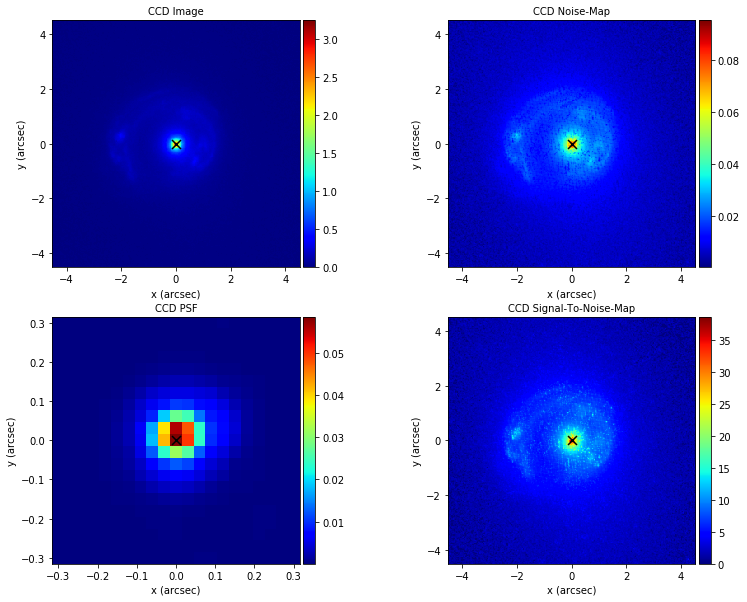

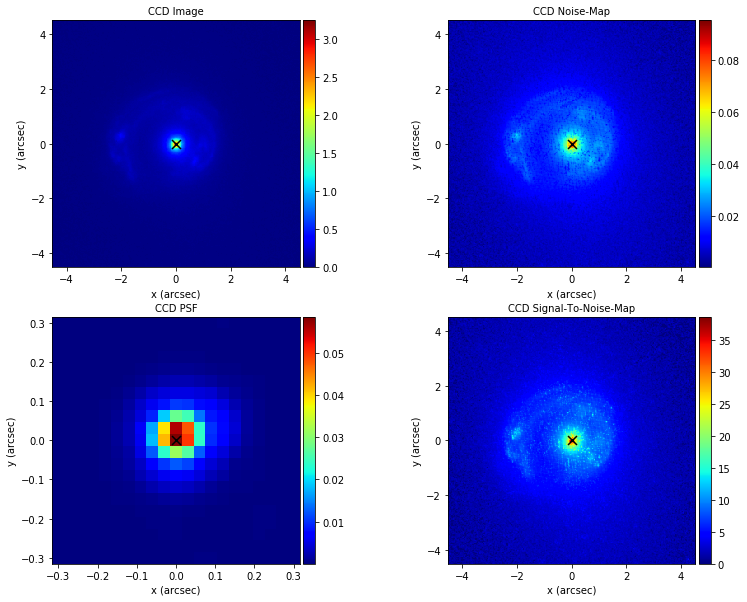

In [5]:
ccd_data = ccd.load_ccd_data_from_fits(image_path=path + '/data/example/' + lens_name + '/image.fits',
                                       psf_path=path+'/data/example/'+lens_name+'/psf.fits',
                                       noise_map_path=path+'/data/example/'+lens_name+'/noise_map.fits',
                                       pixel_scale=pixel_scale)

ccd_plotters.plot_ccd_subplot(ccd_data=ccd_data)

Running a pipeline is easy, we simply import it from the pipelines folder and pass the lens data to its run function. Below, we'll' use a 3 phase example pipeline to fit the data with a parametric lens light, mass and source light profile. Checkout _workspace/pipelines/examples/lens_light_and_x1_source_parametric.py_'  for a full description of the pipeline.

In [6]:
from pipelines.examples import lens_light_and_x1_source_parametric

pipeline = lens_light_and_x1_source_parametric.make_pipeline(pipeline_path='example/' + lens_name + '/')

pipeline.run(data=ccd_data)

OSError: No chains found: /home/jammy/PyCharm/Projects/AutoLens/workspace/output/example/slacs1430+4105/pipeline_lens_light_and_x1_source_parametric/phase_1_lens_light_only/optimizer/multinest

Another pipeline in the examples folder uses 5 phases to ultimately reconstruct the source galaxy on an adaptive pixel-grid.

In [ ]:
from pipelines.examples import lens_light_and_source_inversion

pipeline = lens_light_and_source_inversion.make_pipeline(pipeline_path='example/' + lens_name + '/')

pipeline.run(data=ccd_data)

What if the lens galaxy's light isn't observed in your image? No problem, we have pipelines for that!

In [ ]:
# An example simulated image without lens light emission and 2 source galaxies.
lens_name = 'no_lens_light_and_x2_source'
pixel_scale = 0.1

ccd_data = ccd.load_ccd_data_from_fits(image_path=path + '/data/example/' + lens_name + '/image.fits',
                                       psf_path=path+'/data/example/'+lens_name+'/psf.fits',
                                       noise_map_path=path+'/data/example/'+lens_name+'/noise_map.fits',
                                       pixel_scale=pixel_scale)

ccd_plotters.plot_ccd_subplot(ccd_data=ccd_data)

In [ ]:
from pipelines.examples import no_lens_light_and_x2_source_parametric

pipeline = no_lens_light_and_x2_source_parametric.make_pipeline(pipeline_path='example/' + lens_name + '/')

pipeline.run(data=ccd_data)

In [ ]:
from pipelines.examples import no_lens_light_and_source_inversion

pipeline = no_lens_light_and_source_inversion.make_pipeline(pipeline_path='example/' + lens_name + '/')

pipeline.run(data=ccd_data)